In [1]:
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [2]:
jsons = {}
for fn in glob.glob(r"D:\ig_pipeline\cad\*\*\complaints.json"):
    fn = pathlib.Path(fn)
    with open(fn, "r") as f:
        jsons[fn.parts[-3] + "/" + fn.parts[-2]] = json.load(f)

In [3]:
next(iter(jsons.values()))

[{'object': 'shelf_back_panel-gjsnrt',
  'message': 'Confirm object synset assignment.\nObject assigned to synset: \nDefinition: \nReminder: synset should match the object and not its contents.\n(e.g. orange juice bottle needs to match orange_juice__bottle.n.01\nand not orange_juice.n.01)',
  'complaint': 'no def',
  'processed': False},
 {'object': 'shelf_baseboard-hlhneo',
  'message': 'Confirm object synset assignment.\nObject assigned to synset: \nDefinition: \nReminder: synset should match the object and not its contents.\n(e.g. orange juice bottle needs to match orange_juice__bottle.n.01\nand not orange_juice.n.01)',
  'complaint': 'no def',
  'processed': False},
 {'object': 'shelf_shelf-ymtnqa',
  'message': 'Confirm object synset assignment.\nObject assigned to synset: \nDefinition: \nReminder: synset should match the object and not its contents.\n(e.g. orange juice bottle needs to match orange_juice__bottle.n.01\nand not orange_juice.n.01)',
  'complaint': 'no def',
  'proces

In [6]:
import collections
complaints_by_type = collections.defaultdict(list)
complained_objects = set()
for j in jsons.values():
    for complaint in j:
        if complaint["processed"]:
            continue
            
        complaints_by_type[complaint["message"].split("\n")[0]].append(complaint)
        complained_objects.add(complaint["object"])

In [8]:
print(complaints_by_type.keys())

dict_keys(['Confirm object synset assignment.', 'Confirm reasonable bounding box size:', 'Confirm object visual appearance.', 'Confirm object properties:', 'Confirm object meta links:'])


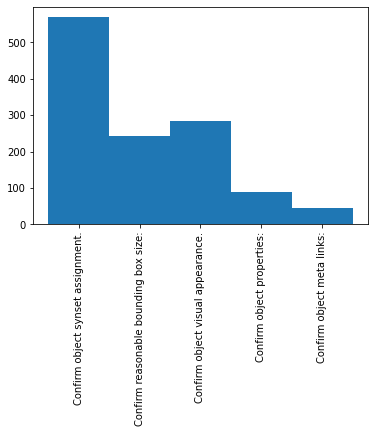

In [11]:
plt.rcParams["figure.figsize"] = (10,6)
labels, values = zip(*[(k, len(v)) for k, v in complaints_by_type.items()])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.show()

In [36]:
complaints_by_type["Confirm object visual appearance."][:50]

[{'object': 'almond-acooui',
  'message': 'Confirm object visual appearance.\nRequirements:\n- make sure there is only one rigid body.\n- make sure the object has a valid texture or appearance.\n- make sure the object has all parts necessary.',
  'complaint': 'multiple almonds show up as single object',
  'processed': False},
 {'object': 'armchair-cyvmhv',
  'message': 'Confirm object visual appearance.\nRequirements:\n- make sure there is only one rigid body.\n- make sure the object has a valid texture or appearance.\n- make sure the object has all parts necessary.',
  'complaint': "I'm not sure it would stand upright, it's designed weirdly with no back support",
  'processed': False},
 {'object': 'armchair-jmunen',
  'message': 'Confirm object visual appearance.\nRequirements:\n- make sure there is only one rigid body.\n- make sure the object has a valid texture or appearance.\n- make sure the object has all parts necessary.',
  'complaint': 'i am not sure the physics would work with

In [22]:
synset_complaints = collections.defaultdict(list)
for x in complaints_by_type["Confirm object synset assignment."]:
    synset_complaints[x["complaint"].strip().lower()].append(x["object"])

In [34]:
synset_complaints

defaultdict(list,
            {'no def': ['shelf_back_panel-gjsnrt',
              'shelf_baseboard-hlhneo',
              'shelf_shelf-ymtnqa',
              'shelf_side-bxfkjj',
              'shelf_top-pfiole',
              'paper_towel_holder-rntefx',
              'protein_powder-rbvrrp',
              'protein_powder-rikjwx',
              'protein_powder-tpcsve',
              'protein_powder-ysgesq',
              'standing_tv-bkyguk',
              'standing_tv-blyapt',
              'standing_tv-ghxsoy',
              'standing_tv-gjlztf',
              'standing_tv-lkpsai',
              'standing_tv-sbxgwj',
              'standing_tv-udotid',
              'standing_tv-wbkvxr',
              'sticky_note-tghqep',
              'top_cabinet-dhguym',
              'top_cabinet-dmwxyl',
              'top_cabinet-eobsmt',
              'top_cabinet-fqhdne',
              'top_cabinet-fqitbw',
              'top_cabinet-jvdbxh',
              'top_cabinet-lsyzkh',
           

In [24]:
no_def_objs = sorted(synset_complaints["no synset"] + synset_complaints["no def"])
no_def_cats = sorted({x.split("-")[0] for x in no_def_objs})
print(no_def_cats)
print(len(no_def_cats))

['bottom_cabinet', 'bottom_cabinet_no_top', 'chocolate_box', 'cocktail_glass', 'coffee_pouch', 'cracker_box', 'green_onion_chopped', 'honing_steel', 'kitchen_analog_scale', 'paper_towel_holder', 'powder_bottle', 'protein_powder', 'shelf_back_panel', 'shelf_baseboard', 'shelf_shelf', 'shelf_side', 'shelf_top', 'standing_tv', 'sticky_note', 'top_cabinet', 'wall_mounted_tv']
21


In [36]:
with open(r"D:\ig_pipeline\qa-logs\pass-one.json") as f:
    print(len(json.load(f)))

1562


In [25]:
from nltk.corpus import wordnet as wn

In [27]:
wn.synset("cabinet.n.01").definition()

'a piece of furniture resembling a cupboard with doors and shelves and drawers; for storage or display'

In [32]:
import csv
def get_synset(category):
    print(category)
    # Read the custom synsets from the CSV file
    custom_synsets = []
    with open(r'D:\ig_pipeline/metadata/custom_synsets.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if category in row[0]:
                return row[1] + " (custom synset)", row[2] + "(hypernyms): " + (wn.synset(row[2])).definition()
    try:
        synset = wn.synsets(category)[0]
    except:
        return "", ""
    return synset.name(), synset.definition()

In [33]:
get_synset("bottom_cabinet")

bottom_cabinet


('', '')